number of grid points =  121
len of each grid unit is=  63.59031170798394 km


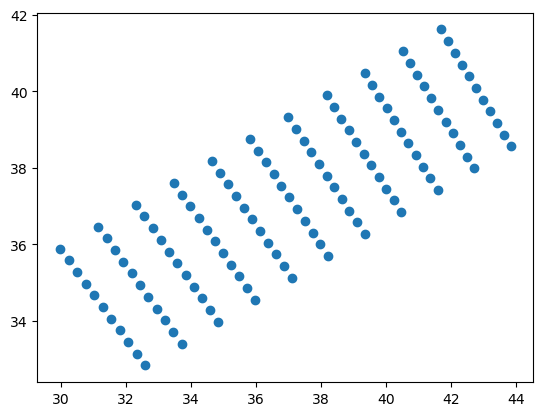

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#this function gives the coordinates of each grid point at variable x and y extends. 
#make the functions "strike_coords" and "strike_coords_list" into one function. then make the functions "strikstrike_coords_grid_list" and "makemake_source_grid_along_strike" into a single function as well, so that the output is the same.

latitudes=[] 
longitudes=[]

strike = 58
event_lat= 37.2251
event_long=37.0209
x_extend=600 
y_extend=200

gridsize=0.20 #in terms of spacing, so essentially gridsize = 0.1 would result in a particular number of points

def strike_coords(strike, event_lat, event_long,extend):
    y_dist=extend * (np.cos(np.deg2rad(strike)))
    new_lat= event_lat + (y_dist/111.1)
    x_dist=extend * (np.sin(np.deg2rad(strike)))
    denom = 111.32 * np.cos(np.deg2rad(event_lat))
    if np.abs(denom) < 1e-2:
        new_long = event_long  # No reliable longitude change, would result in unsuitable values
    else:
        new_long = event_long + (x_dist / denom)
    
    return new_lat, new_long #returns longtitudes an latitudes along one direction of strike.

def strike_coords_list(strike, event_lat, event_long,extend, gridsize):
    lat_long_list=[]
    grid_list=np.arange(0,1,gridsize, dtype=float)
    rev_grid_list=grid_list[::-1]
    for j in rev_grid_list:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, (-1)*extend*(j + gridsize)))
    lat_long_list.append(strike_coords(strike, event_lat, event_long, 0))
    for i in grid_list:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, extend*(i + gridsize)))
    
    return lat_long_list #returns a list of lat and long along opposite directions, along the strike from th source point. 

def strike_coords_list_eqspaced(strike, event_lat, event_long, extend, gridsize):
    

def make_source_grid_along_strike(strike, event_lat, event_long, x_extend, y_extend, gridsize):

    '''The main differences in this function from the previous make_source_grid_hetero are
    1)This function orients the source grid along the strike direction
    2)This function has its x and y extends in Kms, rather than in degrees. although 
    there can be a 
    modification made so that we can input in degrees rather than in kilometers
    '''
    
    grid_list=[]
    temp=[]
    strike_perpendicular = (strike + 90) % 360
    strike_perpendicular_list=strike_coords_list(strike_perpendicular, event_lat, event_long, y_extend, gridsize)
    for i in strike_perpendicular_list:
        temp=strike_coords_list(strike, i[0], i[1], x_extend, gridsize)
        grid_list.append(temp)
        temp=[]
    slat=[]
    slong=[]
    slat = [coord[0] for row in grid_list for coord in row]
    slong= [coord[1] for row in grid_list for coord in row]
    return slong, slat
    


    

longitudes, latitudes= make_source_grid_along_strike(strike, event_lat, event_long, x_extend, y_extend, gridsize )

print("number of grid points = ", len(latitudes))
#print("number of grid points, long = ", len(longitudes))
gridlen=(latitudes[3] - latitudes[2]) * 111.1
#gridwid =(longitudes[24] - longitudes[299])
print("len of each grid unit is= ", gridlen, "km")
#print("wid of each grid unit is= ", gridwid)




plt.scatter(longitudes, latitudes)
plt.show()

#current task - incorporate this code into bp.lib , return long and lat on the function. basically what you have to do is 
#the currrent grid is just placed arbitrarily, without orienting itself to the strike, your job is to make the grid orient along the strike. 

#current problem - it makes the equal number of points in either directions, which is not what we want, we wnat them to be equally spaced, basically square grids.
#modify function as said above. 



number of grid points =  4800
number of grid points longitudinally =  4800


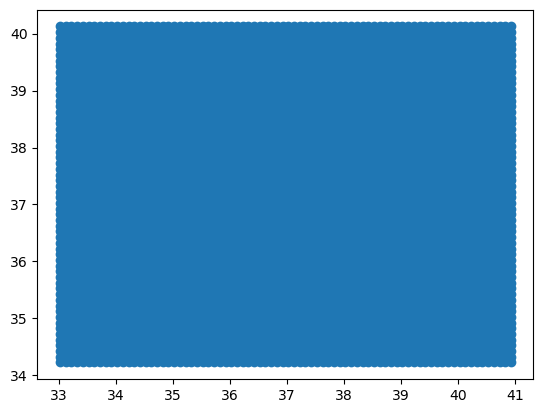

In [31]:
def make_source_grid_hetero(event_long,event_lat,source_grid_extend_x,
                            source_grid_extend_y,source_grid_size): #my job is to make this function orient to the strike direction. 
    '''
    This function makes potential source grid around the epicentre in a area
    defined by a variable source_grid_extend in x and y directions, discretized at a constant
    source_grid_size
    Returns   slat ,slong

    '''
    x=np.arange(event_long-source_grid_extend_x,event_long+source_grid_extend_x,source_grid_size)
    y=np.arange(event_lat-source_grid_extend_y,event_lat+source_grid_extend_y,source_grid_size)
    slat = []
    slong = []
    for i in range(np.size(x)):
        for j in range(np.size(y)):
            slong.append(x[i])
            slat.append(y[j])
    return slong,slat

slong, slat=make_source_grid_hetero(37.0209,37.2251, 4, 3, 0.1)
print("number of grid points = ", len(slat))
print("number of grid points longitudinally = ", len(slong))
plt.scatter(slong, slat)
plt.show()